In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ujson as uj

In [4]:
# Load the data
with open("data.json", "r", encoding="utf-8") as fp:
    data = uj.load(fp)

new_data = []
for day, queries in data.items():
    for query, results in queries.items():
        commit = {"day": day, "query": query, "results": results}
        new_data.append(commit)

df = pd.json_normalize(new_data, max_level=0)

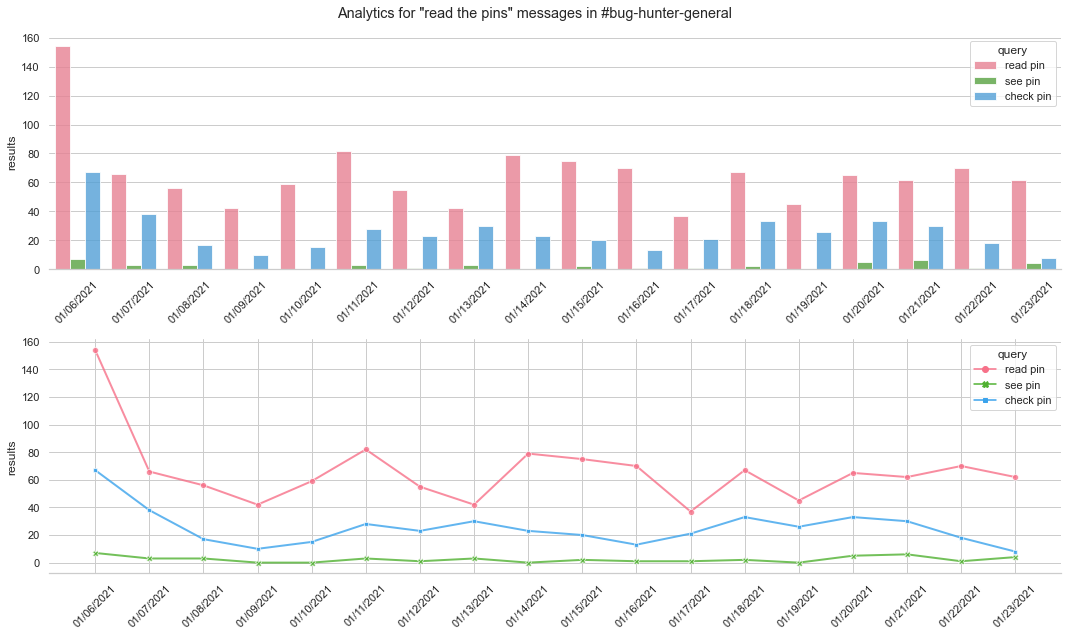

In [6]:
sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(nrows=2, figsize=(15, 9))
fig.suptitle('Analytics for "read the pins" messages in #bug-hunter-general')

ax1 = sns.barplot(
    data=df,
    hue="query",
    x="day",
    y="results",
    ci="cd",
    alpha=0.8,
    palette="husl",
    ax=axs[0],
)

ax2 = sns.lineplot(
    data=df,
    hue="query",
    x="day",
    y="results",
    ax=axs[1],
    alpha=0.8,
    palette="husl",
    style="query",
    markers=True,
    dashes=False,
    linewidth=2,
)

# this is extremely stupid but much cleaner than other methods to do the rotation ¯\_(ツ)_/¯
for tl in ax2.get_xticklabels() + ax1.get_xticklabels():
    tl.set_rotation(45)

for ax in axs:
    ax.set_xlabel("")

sns.despine(left=True)
fig.tight_layout()

In [8]:
fig.savefig("pins analytics.png")